In [2]:
# Download files from HDFS into working environment
! [ -d monte-carlo-risk ] || (echo "Downloading prepared data from HDFS. Please wait..." ; \
                    hdfs dfs -copyToLocal /financial_risk . ; echo "Done!";)

2024-12-05 11:30:23,780 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Done!


In [8]:
# Read data into a PySpark DataFrame using SparkSql
from pyspark.sql import SparkSession

# Step 1: Create a SparkSession
spark = SparkSession.builder \
    .appName("Read CSV from HDFS") \
    .getOrCreate()

# Step 2: Define the HDFS folder path where your CSV files are stored
#hdfs_folder_path = "hdfs://namenode:port/path/to/csv_folder/"
crude_oil_path = "financial_risk/crudeoil.csv"
tbond_path = "financial_risk/crudeoil.csv"

# Step 3: Read CSV files into a PySpark DataFrame
# This will read all CSV files in the specified folder
crude_oil_df = spark.read.csv(crude_oil_path, header=True, inferSchema=True)
tbond_df = spark.read.csv(tbond_path, header=True, inferSchema=True)

# Step 4: Show the DataFrame (optional)
crude_oil_df.show()
tbond_df.show()

# Step 5: Stop the Spark session (optional if script ends here)
spark.stop()


+----------+------+------+------+-----+-------+--------+
|      Date| Price|  Open|  High|  Low|   Vol.|Change %|
+----------+------+------+------+-----+-------+--------+
|01/23/2014| 97.32| 96.69| 97.84|96.41|274.08K|   0.61%|
|01/22/2014| 96.73|  95.2| 96.89|95.12|252.35K|   1.83%|
|01/21/2014| 94.99|  94.0| 95.23|93.43| 35.63K|   1.12%|
|01/20/2014| 93.93| 94.31| 94.31|93.66|   NULL|  -0.46%|
|01/17/2014| 94.37| 94.17| 94.94|93.94|119.89K|   0.44%|
|01/16/2014| 93.96| 94.29| 94.64| 93.6|165.14K|  -0.22%|
|01/15/2014| 94.17| 92.65| 94.64|92.43|263.30K|   1.71%|
|01/14/2014| 92.59| 91.51| 92.88| 91.5|243.47K|   0.86%|
|01/13/2014|  91.8| 92.83| 92.88|91.43|212.21K|  -0.99%|
|01/10/2014| 92.72|  92.3| 93.38|91.99|255.99K|   1.16%|
|01/09/2014| 91.66| 92.58| 92.93|91.24|255.78K|  -0.73%|
|01/08/2014| 92.33| 93.96| 94.18|92.26|244.86K|  -1.43%|
|01/07/2014| 93.67|  93.6| 94.22|93.35|177.18K|   0.26%|
|01/06/2014| 93.43| 94.18| 94.59| 93.2|189.38K|  -0.56%|
|01/03/2014| 93.96| 95.47| 95.7

root
 |-- Date: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Vol.: string (nullable = true)
 |-- Change %: string (nullable = true)



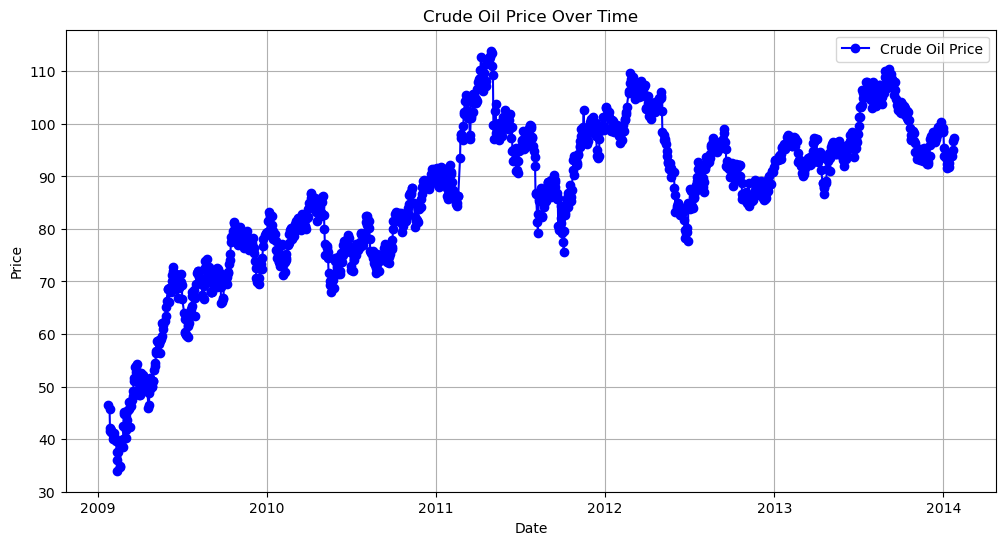

In [18]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt

# Initialize Spark session
spark = SparkSession.builder.appName("Plot Crude Oil Prices").getOrCreate()

# Load the crudeoil.csv file into a PySpark DataFrame
crude_oil_df = spark.read.csv('financial_risk/crudeoil.csv', header=True, inferSchema=True)

# Display the schema to check column names and types
crude_oil_df.printSchema()

# Convert the PySpark DataFrame to a Pandas DataFrame
crudeoil_pd = crude_oil_df.toPandas()

# Ensure the Date column is in datetime format
crudeoil_pd['Date'] = pd.to_datetime(crudeoil_pd['Date'])

# Sort the data by Date for proper plotting
crudeoil_pd = crudeoil_pd.sort_values('Date')

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(crudeoil_pd['Date'], crudeoil_pd['Price'], label='Crude Oil Price', color='blue', marker='o')

# Adding title, labels, and legend
plt.title('Crude Oil Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show();
